# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m$^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [53]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd_star = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])



### Add some calculations to the following code block:

In [65]:
# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,100) #note that this is a different range than given in problem statement, but in office hours Dr.Decaluwe instructed us to use this range
i_elementary = np.zeros_like(delta_phi)


#Standard state free energy of reaction
deltaG_o = g_H2O_Ni_o-(2*g_H_Ni_o + g_Ox_elyte_o) #free energies whose values = 0 omitted from equation

#product over all m phases of species concentration participating in reaction 
prod_C_fwd = C_elyte*(C_Ni_s**2)
prod_C_rev = (C_Ni_s**2)*C_elyte

#temp
T = 1073 #[Kelvin]

# mol charge delivered to electrode per mol rxn
n = -2

#charge transfer coefficient
beta = 0.5

#reverse kinetic coefficient
k_rev_star = k_fwd_star/(exp(-deltaG_o/(R*T)) * (prod_C_rev/prod_C_fwd))

#concentrations for mass action equation
prod_C_fwdk = (C_elyte*X_Ox_elyte)*((X_H_Ni*C_Ni_s)**2)

prod_C_revk = (C_Ni_s*X_Vac_Ni)*(C_Ni_s*X_H2O_Ni)*C_elyte*X_Vac_elyte

#here we go
for ind, E in enumerate(delta_phi):
    
    i_elementary[ind] = n*F*(k_fwd_star*exp(-beta*n*F*delta_phi[ind]/(R*T))*prod_C_fwdk-k_rev_star*exp((1-beta)*n*F*delta_phi[ind]/(R*T))*prod_C_revk)
    

Plot the results:

Text(0, 0.5, 'Current [A/m2]')

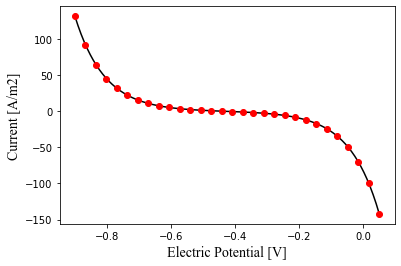

In [66]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

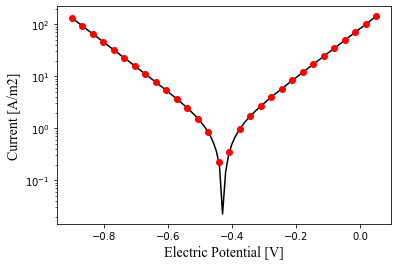

In [56]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

The plotted data correctly match my prediction and understanding of the theory that as $\Delta \phi$ gets more positive, the current density should get more negative at the SOFC anode. This is because $\Delta \phi = \Delta \phi_{electrode}-\Delta \phi_{elyte}$ and so if the electrode electric potential is increased relative to the electrolyte, positive charge will increasingly "want to move" to the lower potential electrolyte. 

In our system, however, negative particles (oxide O2- ions) will experience a lower potential at the electrode than in the electrolyte, so negative particles will favorably move to the electrode. Our definition of positive current is positive charge delivered to electrode, so the impact of increasing $\Delta \phi$ will be decreasing current density.

Finally, I note that the current density approaches 0 at an electric potential of ~ -0.38 V; this must be the equilibrium voltage where the forward and reverse reactions are proceeding at equal rates.



## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

#### Find $\Delta \phi_{eq}$ from interpolation of plot

In [74]:
#find delta_phi_eq
print('once this is approx 0, you have found eq potential: '+ str(np.interp(-.4285,delta_phi,i_elementary)))
delta_phi_eq = -0.4285

once this is approx 0, you have found eq potential: -0.00017046221194448943


#### Calculate $i_{BV}$

In [75]:
i_BV = np.zeros_like(delta_phi)
i_o = n*F*(k_fwd_star**(1-beta))*(k_rev_star**beta)*(prod_C_fwdk**(1-beta))*(prod_C_revk**beta)

eta = np.zeros_like(delta_phi)
for ind, E in enumerate(delta_phi):
    eta[ind] = delta_phi[ind]-delta_phi_eq
    i_BV[ind] = i_o*((exp(-beta*n*F*eta[ind]/(R*T))-exp((1-beta)*n*F*eta[ind]/(R*T))))

#### Let's plot the BV and Marcus currents together:

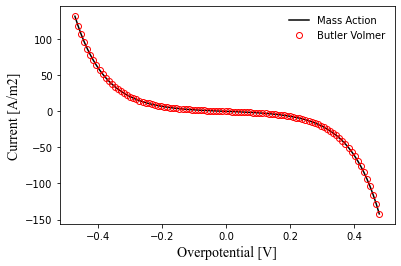

In [76]:
plt.close('all')
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

The calculated Butler Volmer current density tracks perfectly with the mass action kinetics current density. I am not surprised, since section 1.1 and 1.2 of this homework demonstrated that the two are equivalent.

The assumption of constant $i_\circ$ is likely acceptable when mass transport is fast; the expression for $i_\circ$ includes kinetic rate constants and concentrations but neglects the impact of mass transport, assuming that the reaction is the rate-limiting step. Also, $i_\circ$ includes $k^*$ which contains exp($-\frac {\beta n F \Delta \phi}{RT})$, so for large temperature deviations  $k^*$ and hence $i_\circ$ should be recalculated for the appropriate temperature. 


Finally, I think we are also assuming that i_o is the rate of individual one-way reactions at equilibrium, so in conditions where that is not the case (i.e. $i_{rev}$ does not equal $i_{fwd}$, i.e. non equilibrium conditions), it would not a good assumption that $i_\circ$ is constant.

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

### Set-up
Noting that the reaction of interest to this problem produces electrons (also, we were told that this reaction occurs at the anode); I select equation 3.23 ($i=i_o exp \frac{α_a F}
{RT} η$)
 from Fuller to model the Tafel anodic current. For $\alpha_a$, I use $\alpha_a = n_{elec} \beta$

In [59]:
i_Tafel = np.zeros_like(delta_phi)
n_elec = 2
alpha_a = n_elec*beta

for ind, E in enumerate(delta_phi):
    
    i_Tafel[ind] = i_o*(exp(alpha_a*F*eta[ind]/(R*T)))

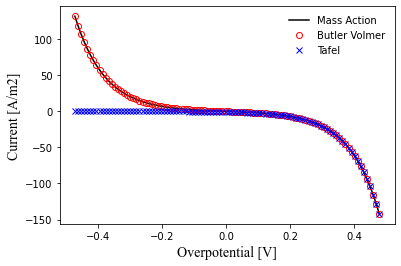

In [60]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Discussion: 

I have modeled the Tafel approxmimation for large positive overpotentials (defined in chapter 3 of Fuller as "$\eta$ > 100mV"), where the anodic current dominates. Indeed, for overpotentials 0.1-0.4V, the Tafel approximation appears to be quite good and tracks nicely with the BV and mass action calculated current densities. 

However, I also observe excellent tracking between -0.1 V and 0.1 V, which should be considered a small overpotential. I am not sure if this is correct.

For large negative overpotentials, the Tafel approximation deviates rapidly starting at about $\eta$ = -0.2 V. This corresponds with my understanding that if the applied potential is lower than $\Delta \phi_{eq}$, reduction dominates. The equation I supplied in the code above would no longer be an apt approximation, since anodic current would no longer dominate and the cathodic exponential term would win out.

If we desired, we could plot the Tafel approximated cathodic current by plotting  $i_{Tafel}[ind] = -i_o(exp(-\frac{\alpha_cF\eta[ind]}/{RT}))$.

#### Play with the limits, below, to highlight trends which support your discussion claims.



#### Fig below: Large positive overpotentials (0.1-.4V): Good Approximation

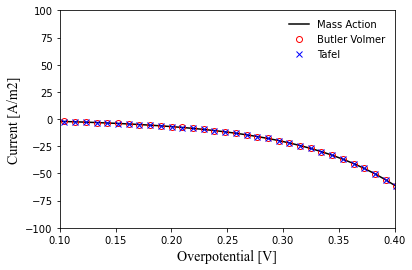

In [82]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((0.1, 0.4))
plt.ylim((-100,100))
plt.show()

#### Fig below: Large negative overpotentials (-0.5 to -0.1V): Bad Approximation

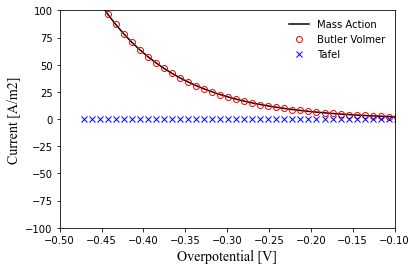

In [62]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.5,-0.1))
plt.ylim((-100,100))
plt.show()

#### Fig below: Small overpotentials (-0.1 to 0.1V): Also good approximation (?)

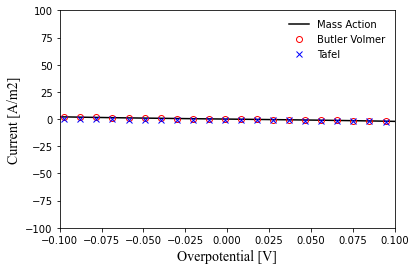

In [83]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.1,.1))
plt.ylim((-100,100))
plt.show()

### Final Discussion:


The Tafel approximation is simple, but only generates useful results for one direction of the reaction (cathodic or anodic), for large overpotentials. In cases where $i_o$ is not known, linear portions of the curve can be fit to find the slope, and back out the value of $i_o$. For my computation, it appears that the Tafel approximation also generated a good approximation for low overpotentials, which I do not believe it should. I may have abused the formula.

Finally, this was an interesting assignment that helped me visually understand the inter-relatedness of three types of current density modeling in electrochemical systems: mass action kinetics, Butler-Volmer, and the Tafel approximation.